# Домашнее задание №2
## Бредис Георгий

In [2]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2

## Задание 1.

In [3]:
def true_pred_plot(trues, preds):
    plt.scatter(np.arange(19), trues, label='True')
    plt.scatter(np.arange(19), preds, label='Predicted')
    plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=2, mode="expand", borderaxespad=0.)
    plt.show()

In [4]:
data = pd.read_csv('задание1.xls', sep=r'\s+')

In [5]:
for i in range(len(data)):
    data.loc[i] = data.t.loc[i].split()
data = data.set_index('t')
data = data.apply(lambda x: x.apply(lambda x: x.replace(',','.')))
data = data.astype(float)

In [6]:
data

,Y,X1,X2,X3,X4
t,,,,,
1,31.2,492.9,37.3,54.7,77.4
2,33.3,528.6,38.1,63.7,80.2
3,35.6,560.3,39.3,69.8,80.4
4,36.4,624.6,37.8,65.9,83.9
5,36.7,666.4,38.4,64.5,85.5
6,38.4,717.8,40.1,70.0,93.7
7,40.4,768.2,38.6,73.2,106.1
8,40.3,843.3,39.8,67.8,104.8
9,41.8,911.6,39.7,79.1,114.0


### Пункт 1.

In [7]:
data_log = np.log(data)

Уравнения регрессии имеют следующий вид. Логарифмирую данные, приходим к тому, что вместо степенной регресии, можем использовать линейную (как название уравнение регресии, а не как вид предсказанных данных).

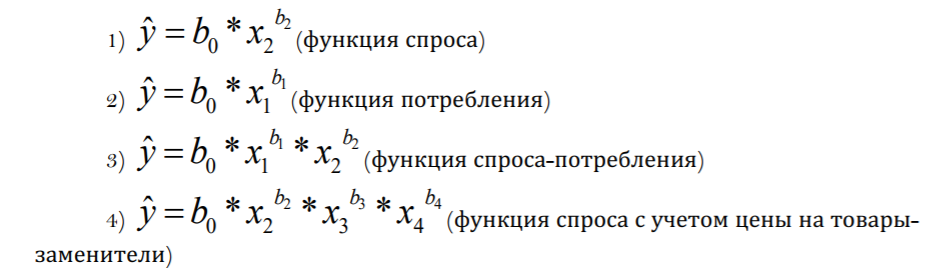

Model #1
b0=1.5777, b2=0.5527


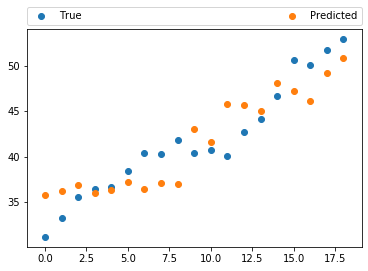

R2 score = 0.7554
MSE score = 8.9826
-------------------------

Model #2
b0=1.7460, b1=0.2849


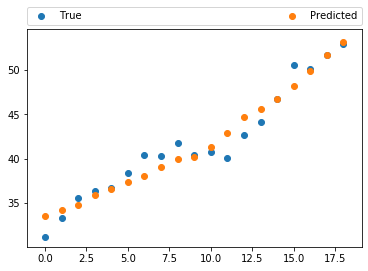

R2 score = 0.9443
MSE score = 2.0449
-------------------------

Model #3
b0=2.0185, b1=0.4161, b2=-0.3048


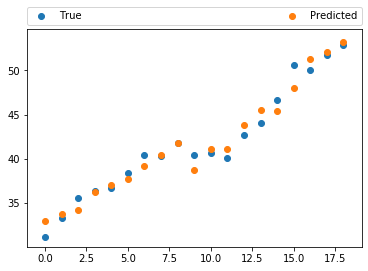

R2 score = 0.9653
MSE score = 1.2756
-------------------------

Model #4
b0=2.3152, b2=-0.4875, b3=0.2374, b4=0.4601


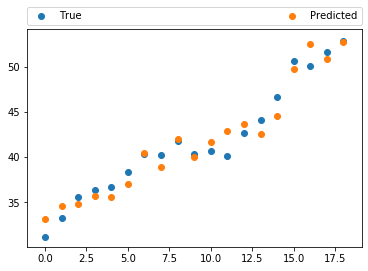

R2 score = 0.9491
MSE score = 1.8687


In [8]:
#1 функция спроса
print('Model #1')
lin_1 = LinearRegression()
lin_1.fit(data_log.X2.to_numpy().reshape(-1,1), data_log.Y.to_numpy())
print("b0={:0.4f}, b2={:0.4f}".format(lin_1.intercept_, *lin_1.coef_))
preds_1 = np.exp(lin_1.intercept_)*data.X2**lin_1.coef_
true_pred_plot(data.Y, preds_1)
print("R2 score = {:0.4f}".format(r2(data.Y, preds_1)))
print("MSE score = {:0.4f}".format(mse(data.Y, preds_1)))
print('-'*25, end='\n\n')

#2 функция потребления
print('Model #2')
lin_2 = LinearRegression()
lin_2.fit(data_log.X1.to_numpy().reshape(-1,1), data_log.Y.to_numpy())
print("b0={:0.4f}, b1={:0.4f}".format(lin_2.intercept_, *lin_2.coef_))
preds_2 = np.exp(lin_2.intercept_)*data.X1**lin_2.coef_
true_pred_plot(data.Y, preds_2)
print("R2 score = {:0.4f}".format(r2(data.Y, preds_2)))
print("MSE score = {:0.4f}".format(mse(data.Y, preds_2)))
print('-'*25, end='\n\n')

#3 функция спроса-потребления
print('Model #3')
lin_3 = LinearRegression()
lin_3.fit(data_log[['X1','X2']].to_numpy(), data_log.Y.to_numpy())
print("b0={:0.4f}, b1={:0.4f}, b2={:0.4f}".format(lin_3.intercept_, *lin_3.coef_))
preds_3 = np.exp(lin_3.intercept_)*data.X1**lin_3.coef_[0]*data.X2**lin_3.coef_[1]
true_pred_plot(data.Y, preds_3)
print("R2 score = {:0.4f}".format(r2(data.Y, preds_3)))
print("MSE score = {:0.4f}".format(mse(data.Y, preds_3)))
print('-'*25, end='\n\n')

#4 функция спроса с учетом цены ан товары-заменители
print('Model #4')
lin_4 = LinearRegression()
lin_4.fit(data_log[['X2', 'X3','X4']].to_numpy(), data_log.Y.to_numpy())
print("b0={:0.4f}, b2={:0.4f}, b3={:0.4f}, b4={:0.4f}".format(lin_4.intercept_, *lin_4.coef_))
preds_4 = np.exp(lin_4.intercept_)*data.X2**lin_4.coef_[0]*data.X3**lin_4.coef_[1]*data.X4**lin_4.coef_[2]
true_pred_plot(data.Y, preds_4)
print("R2 score = {:0.4f}".format(r2(data.Y, preds_4)))
print("MSE score = {:0.4f}".format(mse(data.Y, preds_4)))

По графикам, кажется, что лучше всех справляется модель ***спроса-потребления***, это подтверждают и метрики. Интуитивно кажется что доход и стоимость фунта куриного мяса больше всего влияют на его потребление. Также стоит отметить что стоимость алтернатив также влияет на потребление куриного мясо, но при этом в меньшей степени чем доход. 

### Пункт 2.

In [9]:
from scipy.stats import shapiro

Если результат теста Шапиро-Уилка меньше 1, то гипотеза о нормальности исходного распределения отклоняется.

In [10]:
for column in data.columns[1:]:
    test = shapiro(data[column])
    if test[0] < 1:
        print('Признак {} не распределен нормально'.format(column))

Признак X1 не распределен нормально
Признак X2 не распределен нормально
Признак X3 не распределен нормально
Признак X4 не распределен нормально


### Пункт 3.

In [11]:
from scipy.stats import boxcox
corrected_data = data.copy()
for column in data.columns[1:]:
    corrected_data[column] = np.array(boxcox(data[column])[0])
corrected_data = pd.DataFrame(corrected_data, columns = data.columns[1:])
corrected_data

,X1,X2,X3,X4
t,,,,
1,2.795503,1.192043,2.523566,1.574717
2,2.806068,1.193245,2.578226,1.577477
3,2.814698,1.194966,2.610052,1.577668
4,2.830396,1.192800,2.590128,1.580898
5,2.839513,1.193684,2.582613,1.582304
6,2.849752,1.196062,2.611036,1.588905
7,2.858904,1.193974,2.626317,1.597316
8,2.871180,1.195655,2.600014,1.596509
9,2.881167,1.195519,2.652413,1.601905


### Пункт 4.

In [12]:
from scipy.stats import mannwhitneyu

mannwhitneyu(data.X3, data.X4)

MannwhitneyuResult(statistic=102.0, pvalue=0.011387432686168828)

Выберем уровень значимости 0.05. Так как p-value теста меньше, то отклоняем нулевую гипотезу о статистически *схожих* распределениях признака. Тоже самое нам позволяет сделать и статистика равная 102, которая меньше соответствующего табличного значения. Это показывает что распределение признаков **статистически существенно** различается.

### Пункт 5.

In [13]:
from scipy.stats import fligner
from scipy.stats import ttest_ind
fligner(data.X2, data.X3)

FlignerResult(statistic=16.797459660607196, pvalue=4.158894013328987e-05)

Выберем уровень значимости 0.05. Так как p-value теста меньше, то мы отклоняем нулевую гипотезу о равенстве дисперсий этих распределений. 

In [14]:
ttest_ind(data.X2, data.X3)

Ttest_indResult(statistic=-5.937606839472742, pvalue=8.419977507062957e-07)

Критерий стьюдента говорит нам о неравенстве математических ожиданий двух случайных величин, это говорит нам о том что признаки стоимости курицы и свинины статистически различаются.

## Задание 2.

In [48]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.model_selection import train_test_split

data = pd.read_excel('задание2.xlsx')

In [49]:
def fit_predict_score(degrees): 
    poly = PolynomialFeatures(degree=degrees)
    poly_variables = poly.fit_transform(data[['staff', 'adverts', 'projects']])

    poly_var_train, poly_var_test, res_train, res_test = train_test_split(poly_variables, data.profitability, test_size = 0.3, random_state = 4)

    regression = linear_model.LinearRegression()

    model = regression.fit(poly_var_train, res_train)
    score_test = model.score(poly_var_test, res_test)
    score_train = model.score(poly_var_train, res_train)
    print('Train score = {:0.4f}'.format(score_train))
    print('Test score = {:0.4f}'.format(score_test))

In [50]:
print('-'*25)
for i in range(1, 5):
    print('Number of degrees {}'.format(i))
    fit_predict_score(i)
    print('-'*25)

-------------------------
Number of degrees 1
Train score = 0.8146
Test score = 0.3979
-------------------------
Number of degrees 2
Train score = 0.9434
Test score = 0.6580
-------------------------
Number of degrees 3
Train score = 0.9760
Test score = 0.6991
-------------------------
Number of degrees 4
Train score = 1.0000
Test score = -4283.7269
-------------------------


Согласно результатам на тестовой выборке степень полинома, лучше всего объясняющая данные (т.е. принимающая наибольшее значение на тестовой выборке) равна 3, что соответсвтует интуитивному предположению о том, что для трех признаков, полином 3 степени будет лучше всего описывать зависимую переменную.

## Задание 3.

In [17]:
from sklearn.decomposition import PCA

In [55]:
data = pd.read_excel('задание3.xlsx', header=2, index_col='id')

In [57]:
pca = PCA(n_components=14)
pca.fit(data)
perc = 0
for i in range(14):
    perc += pca.explained_variance_ratio_[i]
    if perc >= 0.75:
        mem = i+1
        break

In [58]:
print('Количество главнных компомент позволяющих сохранить больше 75% информации = {}'.format(mem))

Количество главнных компомент позволяющих сохранить больше 75% информации = 2


Теперь покажем как при полученных компонент и изменненых данных можно вернуться к первоначальной выборке. Сначала получим новые данные, а после при помощи обратного преобразования получим первичные данные.

In [63]:
data

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14
id,,,,,,,,,,,,,,
96,0,60.96,2.68,186.81,0.67,4.02,45.11,5.93,0.67,705.98,0,42.02,2.68,100.00
97,0,55.02,7.42,11.34,2.18,4.36,89.58,3.29,1.31,568.75,2,29.96,4.72,100.00
99,0,69.08,51.50,56.98,23.53,28.41,129.33,16.78,9.92,806.07,18,29.21,11.24,41.70
101,0,53.54,64.43,59.06,1.34,2.68,86.71,9.09,2.68,675.82,0,21.33,8.51,32.17
103,0,61.61,56.86,96.73,19.57,20.31,88.33,13.87,1.85,705.08,6,18.79,3.14,74.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1804,0,78.22,128.12,143.61,1.89,6.24,53.79,9.40,7.94,736.24,4,44.48,3.87,83.96
1806,0,73.79,1.91,3.83,6.70,4.78,13.76,6.20,0.96,1182.20,0,33.59,0.39,100.00
1807,0,72.16,26.44,19.04,4.23,10.58,0.00,0.00,4.23,279.09,2,11.15,6.06,0.00


In [71]:
new_data = pca.transform(data)
pd.DataFrame(pca.inverse_transform(new_data))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-1.387779e-16,60.96,2.680000e+00,186.81,6.700000e-01,4.02,4.511000e+01,5.930000e+00,6.700000e-01,705.98,3.552714e-14,42.02,2.68,1.000000e+02
1,-1.110223e-16,55.02,7.420000e+00,11.34,2.180000e+00,4.36,8.958000e+01,3.290000e+00,1.310000e+00,568.75,2.000000e+00,29.96,4.72,1.000000e+02
2,2.775558e-17,69.08,5.150000e+01,56.98,2.353000e+01,28.41,1.293300e+02,1.678000e+01,9.920000e+00,806.07,1.800000e+01,29.21,11.24,4.170000e+01
3,-1.387779e-16,53.54,6.443000e+01,59.06,1.340000e+00,2.68,8.671000e+01,9.090000e+00,2.680000e+00,675.82,8.526513e-14,21.33,8.51,3.217000e+01
4,-1.387779e-16,61.61,5.686000e+01,96.73,1.957000e+01,20.31,8.833000e+01,1.387000e+01,1.850000e+00,705.08,6.000000e+00,18.79,3.14,7.496000e+01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435,-1.804112e-16,78.22,1.281200e+02,143.61,1.890000e+00,6.24,5.379000e+01,9.400000e+00,7.940000e+00,736.24,4.000000e+00,44.48,3.87,8.396000e+01
436,-1.249001e-16,73.79,1.910000e+00,3.83,6.700000e+00,4.78,1.376000e+01,6.200000e+00,9.600000e-01,1182.20,5.684342e-14,33.59,0.39,1.000000e+02
437,-4.163336e-17,72.16,2.644000e+01,19.04,4.230000e+00,10.58,2.557954e-13,-2.131628e-14,4.230000e+00,279.09,2.000000e+00,11.15,6.06,-1.421085e-13
438,2.636780e-16,88.00,1.665000e+01,19.49,6.380000e+00,9.21,2.960200e+02,1.794000e+01,3.286260e-14,1988.55,1.300000e+01,44.89,37.32,1.790000e+01


In [72]:
(pca.inverse_transform(new_data)-np.array(data)).sum()

4.7883641496326845e-12

Как мы видим разница между первоначальными данными и теми, что мы получили после обратного преобразования, очень мала, причиной которой служит машинная неточность.

## Задание 4

In [439]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score as f1, accuracy_score as accuracy
from sklearn.metrics import precision_score as precision, recall_score as recall
from sklearn.metrics import confusion_matrix, roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [461]:
def all_metrics(trues, preds, probs):
    print("Accuracy = {:.4f}".format(accuracy(trues, preds)))
    print("Precision = {:.4f} Recall = {:.4f}".format(precision(trues, preds), recall(trues, preds)))
    print("F-Measure = {:.4f}".format(f1(trues, preds)))
    
    plt.title('Confusion Matrix')
    sns.heatmap(confusion_matrix(trues, preds).astype(int), annot=True)
    plt.show()
    
    probs = probs[:,1]
    fpr, tpr, threshold = roc_curve(y_test, probs)
    roc_auc = auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

Так как данных немного, для отбора признаков мы можем позволить себе проверить качество логистической регресии на каждой объясняющей переменной, и по полученной информации выбрать релевантные. Не зная качество собранных данных будем пользоваться кросс-валидацией, по принципу stratified, чтобы сохранить распределние классов согласно первоначальным данным. После возьмем признаки которые хоть как-то изменяют f-меру, чтобы откинуть нерелевантные.

In [462]:
data = pd.read_excel('задание4.xls')
X_train, X_val, y_train, y_val = train_test_split(data[data.columns[1:]], data.target, shuffle=True)

In [463]:
correct_features = []
f_scores = []
skf = StratifiedKFold(n_splits=5, shuffle=True)
for fold, (tr_idx, val_idx) in enumerate(skf.split(data[data.columns[1:]], data.target)):
    f_scores.append([])
    X_train, y_train = data[data.columns[1:]].loc[tr_idx], data.target.loc[tr_idx]
    X_val, y_val = data[data.columns[1:]].loc[val_idx], data.target.loc[val_idx]
    for column in data.columns[1:]:
        cls = LogisticRegression(penalty='none')
        cls.fit(X_train[column].to_numpy().reshape(-1,1), y_train)
        preds = cls.predict(X_val[column].to_numpy().reshape(-1,1))
        f_score = f1(y_val, preds)
        f_scores[fold].append(f_score)

f_scores = np.array(f_scores).mean(axis=0)

In [464]:
good_features = list(data.columns[1:][np.where(f_scores>0)[0]])
print('Подходящие признаки "{}" "{}" "{}"'.format(*good_features))

Подходящие признаки "interest" "climate" "dist"


In [465]:
new_data = data[good_features]
y = data.target

После того как преобразовали исходные данные можем строить классификационную модель. Определять качество будем на тестовой выборке при помощи метрик **accuracy**, **precision**, **recall**, **F1**, **ROC-AUC**, а также посмотрим на матрицу ошибок.

In [470]:
cls = LogisticRegression(penalty='none')
X_train, X_test, y_train, y_test = train_test_split(new_data, y)
cls.fit(X_train, y_train)
preds = cls.predict(X_test)
probs = cls.predict_proba(X_test)

Accuracy = 0.7480
Precision = 0.6364 Recall = 0.3784
F-Measure = 0.4746


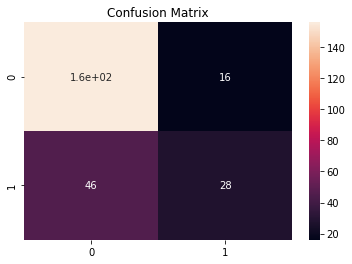

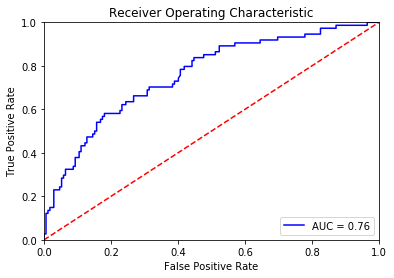

In [471]:
all_metrics(y_test, preds, probs)

Теперь мы можем проинтерпретировать модель. Из всех переменных представленных в первоначальных данных, кажется что выбранные (а именно **"interest climate dist"**) лучше всего могут объяснить собирается сотрудник уходить или нет, именно они были выбраны и нашей моделью. Также можно выделить переменные **"age offhour salary"**, выглядящие достаточно важно для принятия решения, но при этом не прошедшие отбор кросс-валидацией. Это можно объяснить: неподходящей моделью (логистическая регрессия работает с бинарными признаками (offhour, salary) хуже чем другие нелинейные модели); малым размером выборки; и тем что нам неизвестно как они были собраны.